<a href="https://www.kaggle.com/code/basirajafarova/suicide-analysis-by-age?scriptVersionId=142468480" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/suicides/Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv


In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('/kaggle/input/suicides/Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv')

In [4]:
data.tail(15)

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
6375,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Male: Hispanic or Latino: All races: 25-44 years,7.133,2018,42,25-44 years,3.0,15.8,NaN
6376,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Male: Hispanic or Latino: All races: 45-64 years,7.134,2018,42,45-64 years,4.0,14.0,NaN
6377,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Male: Hispanic or Latino: All races: 65 years ...,7.135,2018,42,65 years and over,5.0,15.0,NaN
6378,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Not Hispanic or Latino: White: 15-24 y...,7.212,2018,42,15-24 years,2.0,6.7,NaN
6379,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Not Hispanic or Latino: White: 25-44 y...,7.213,2018,42,25-44 years,3.0,10.4,NaN
6380,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Not Hispanic or Latino: White: 45-64 y...,7.214,2018,42,45-64 years,4.0,13.0,NaN
6381,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Not Hispanic or Latino: White: 65 year...,7.215,2018,42,65 years and over,5.0,6.3,NaN
6382,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Not Hispanic or Latino: Black or Afric...,7.222,2018,42,15-24 years,2.0,4.2,NaN
6383,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Not Hispanic or Latino: Black or Afric...,7.223,2018,42,25-44 years,3.0,4.5,NaN
6384,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Not Hispanic or Latino: Black or Afric...,7.224,2018,42,45-64 years,4.0,3.1,NaN


In [5]:
data.columns

Index(['INDICATOR', 'UNIT', 'UNIT_NUM', 'STUB_NAME', 'STUB_NAME_NUM',
       'STUB_LABEL', 'STUB_LABEL_NUM', 'YEAR', 'YEAR_NUM', 'AGE', 'AGE_NUM',
       'ESTIMATE', 'FLAG'],
      dtype='object')

In [6]:
data.drop(['INDICATOR'],axis=1,inplace=True)

In [7]:
data.drop('UNIT',axis=1,inplace=True)

In [8]:
data.drop('ESTIMATE',axis=1,inplace=False)

,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,FLAG
0,1,Total,0,All persons,0.000,1950,1,All ages,0.0,NaN
1,1,Total,0,All persons,0.000,1960,2,All ages,0.0,NaN
2,1,Total,0,All persons,0.000,1970,3,All ages,0.0,NaN
3,1,Total,0,All persons,0.000,1980,4,All ages,0.0,NaN
4,1,Total,0,All persons,0.000,1981,5,All ages,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
6385,2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Not Hispanic or Latino: Black or Afric...,7.225,2018,42,65 years and over,5.0,NaN
6386,2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 15-24 y...,7.232,2018,42,15-24 years,2.0,NaN
6387,2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 25-44 y...,7.233,2018,42,25-44 years,3.0,NaN
6388,2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 45-64 y...,7.234,2018,42,45-64 years,4.0,NaN


In [9]:
data.drop('ESTIMATE',axis=1,inplace=True)

In [10]:
data.drop('FLAG',axis=1,inplace=True)

In [11]:
data.shape

(6390, 9)

In [12]:
data.isna().sum()

UNIT_NUM          0
STUB_NAME         0
STUB_NAME_NUM     0
STUB_LABEL        0
STUB_LABEL_NUM    0
YEAR              0
YEAR_NUM          0
AGE               0
AGE_NUM           0
dtype: int64

In [13]:
data.groupby('AGE').size()

AGE
10-14 years           126
15-19 years           126
15-24 years           812
20-24 years           126
25-34 years           126
25-44 years           812
35-44 years           126
45-54 years           126
45-64 years           812
55-64 years           126
65 years and over     812
65-74 years           212
75-84 years           212
85 years and over     212
All ages             1624
dtype: int64

In [14]:
data.groupby(['AGE']).agg('count')

,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE_NUM
AGE,,,,,,,,
10-14 years,126,126,126,126,126,126,126,126
15-19 years,126,126,126,126,126,126,126,126
15-24 years,812,812,812,812,812,812,812,812
20-24 years,126,126,126,126,126,126,126,126
25-34 years,126,126,126,126,126,126,126,126
25-44 years,812,812,812,812,812,812,812,812
35-44 years,126,126,126,126,126,126,126,126
45-54 years,126,126,126,126,126,126,126,126
45-64 years,812,812,812,812,812,812,812,812


In [15]:
data.loc[data.STUB_LABEL=='All persons'].groupby('AGE').agg('count')

,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE_NUM
AGE,,,,,,,,
All ages,84,84,84,84,84,84,84,84


In [16]:
import matplotlib.pyplot as plt

<Axes: xlabel='AGE'>

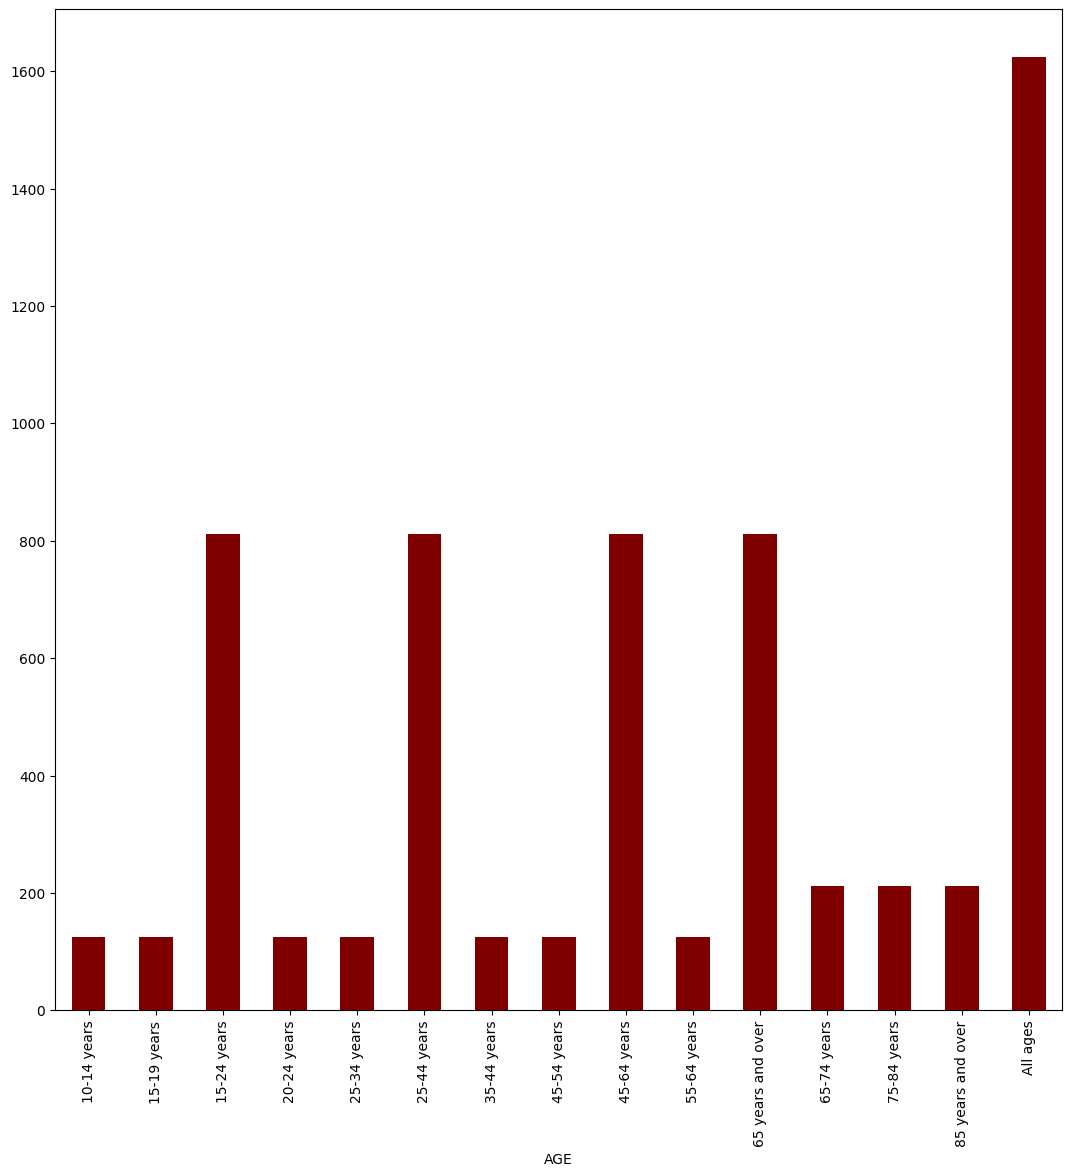

In [17]:
data.groupby('AGE').size().plot(kind=('bar'),color='maroon',figsize=(13,13))


In [18]:
data.columns

Index(['UNIT_NUM', 'STUB_NAME', 'STUB_NAME_NUM', 'STUB_LABEL',
       'STUB_LABEL_NUM', 'YEAR', 'YEAR_NUM', 'AGE', 'AGE_NUM'],
      dtype='object')

In [19]:
data.YEAR.value_counts()

YEAR
2018    276
2008    162
2000    162
2001    162
2002    162
2003    162
2004    162
2005    162
2006    162
2007    162
2009    162
2010    162
2011    162
2012    162
2013    162
2014    162
2015    162
2016    162
2017    162
1999    162
1960    138
1950    138
1997    138
1996    138
1970    138
1980    138
1981    138
1982    138
1983    138
1984    138
1985    138
1986    138
1987    138
1988    138
1989    138
1990    138
1991    138
1992    138
1993    138
1994    138
1995    138
1998    138
Name: count, dtype: int64

In [20]:
a=data.groupby('YEAR').size()

Text(0.5, 1.0, 'Suicides by years')

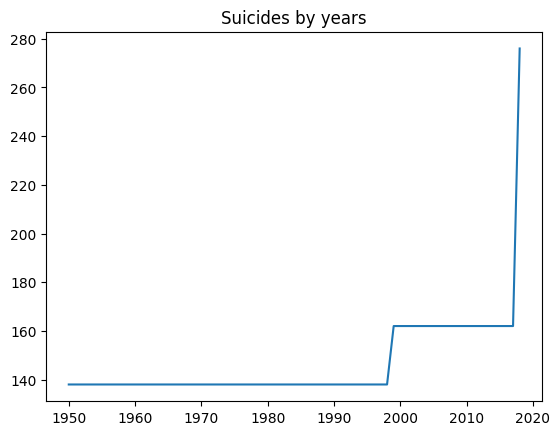

In [21]:
plt.plot(a)
plt.title('Suicides by years')

In [22]:
# 15- 24 years suicides for 2018
b=data[(data.YEAR== 2018) & (data.AGE_NUM==2.0) ]

In [23]:
data


,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM
0,1,Total,0,All persons,0.000,1950,1,All ages,0.0
1,1,Total,0,All persons,0.000,1960,2,All ages,0.0
2,1,Total,0,All persons,0.000,1970,3,All ages,0.0
3,1,Total,0,All persons,0.000,1980,4,All ages,0.0
4,1,Total,0,All persons,0.000,1981,5,All ages,0.0
...,...,...,...,...,...,...,...,...,...
6385,2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Not Hispanic or Latino: Black or Afric...,7.225,2018,42,65 years and over,5.0
6386,2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 15-24 y...,7.232,2018,42,15-24 years,2.0
6387,2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 25-44 y...,7.233,2018,42,25-44 years,3.0
6388,2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 45-64 y...,7.234,2018,42,45-64 years,4.0


<Axes: xlabel='STUB_NAME_NUM'>

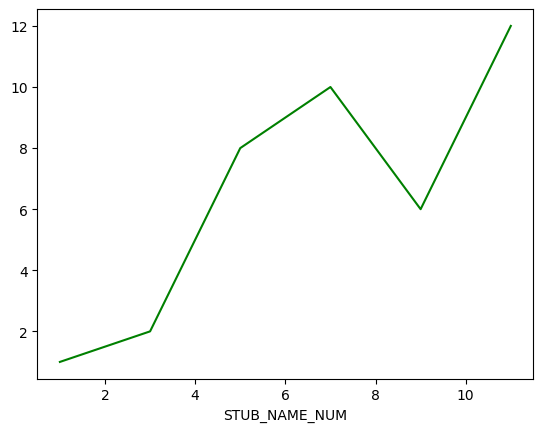

In [24]:
b.groupby('STUB_NAME_NUM').size().plot(color=('green'))

<Axes: >

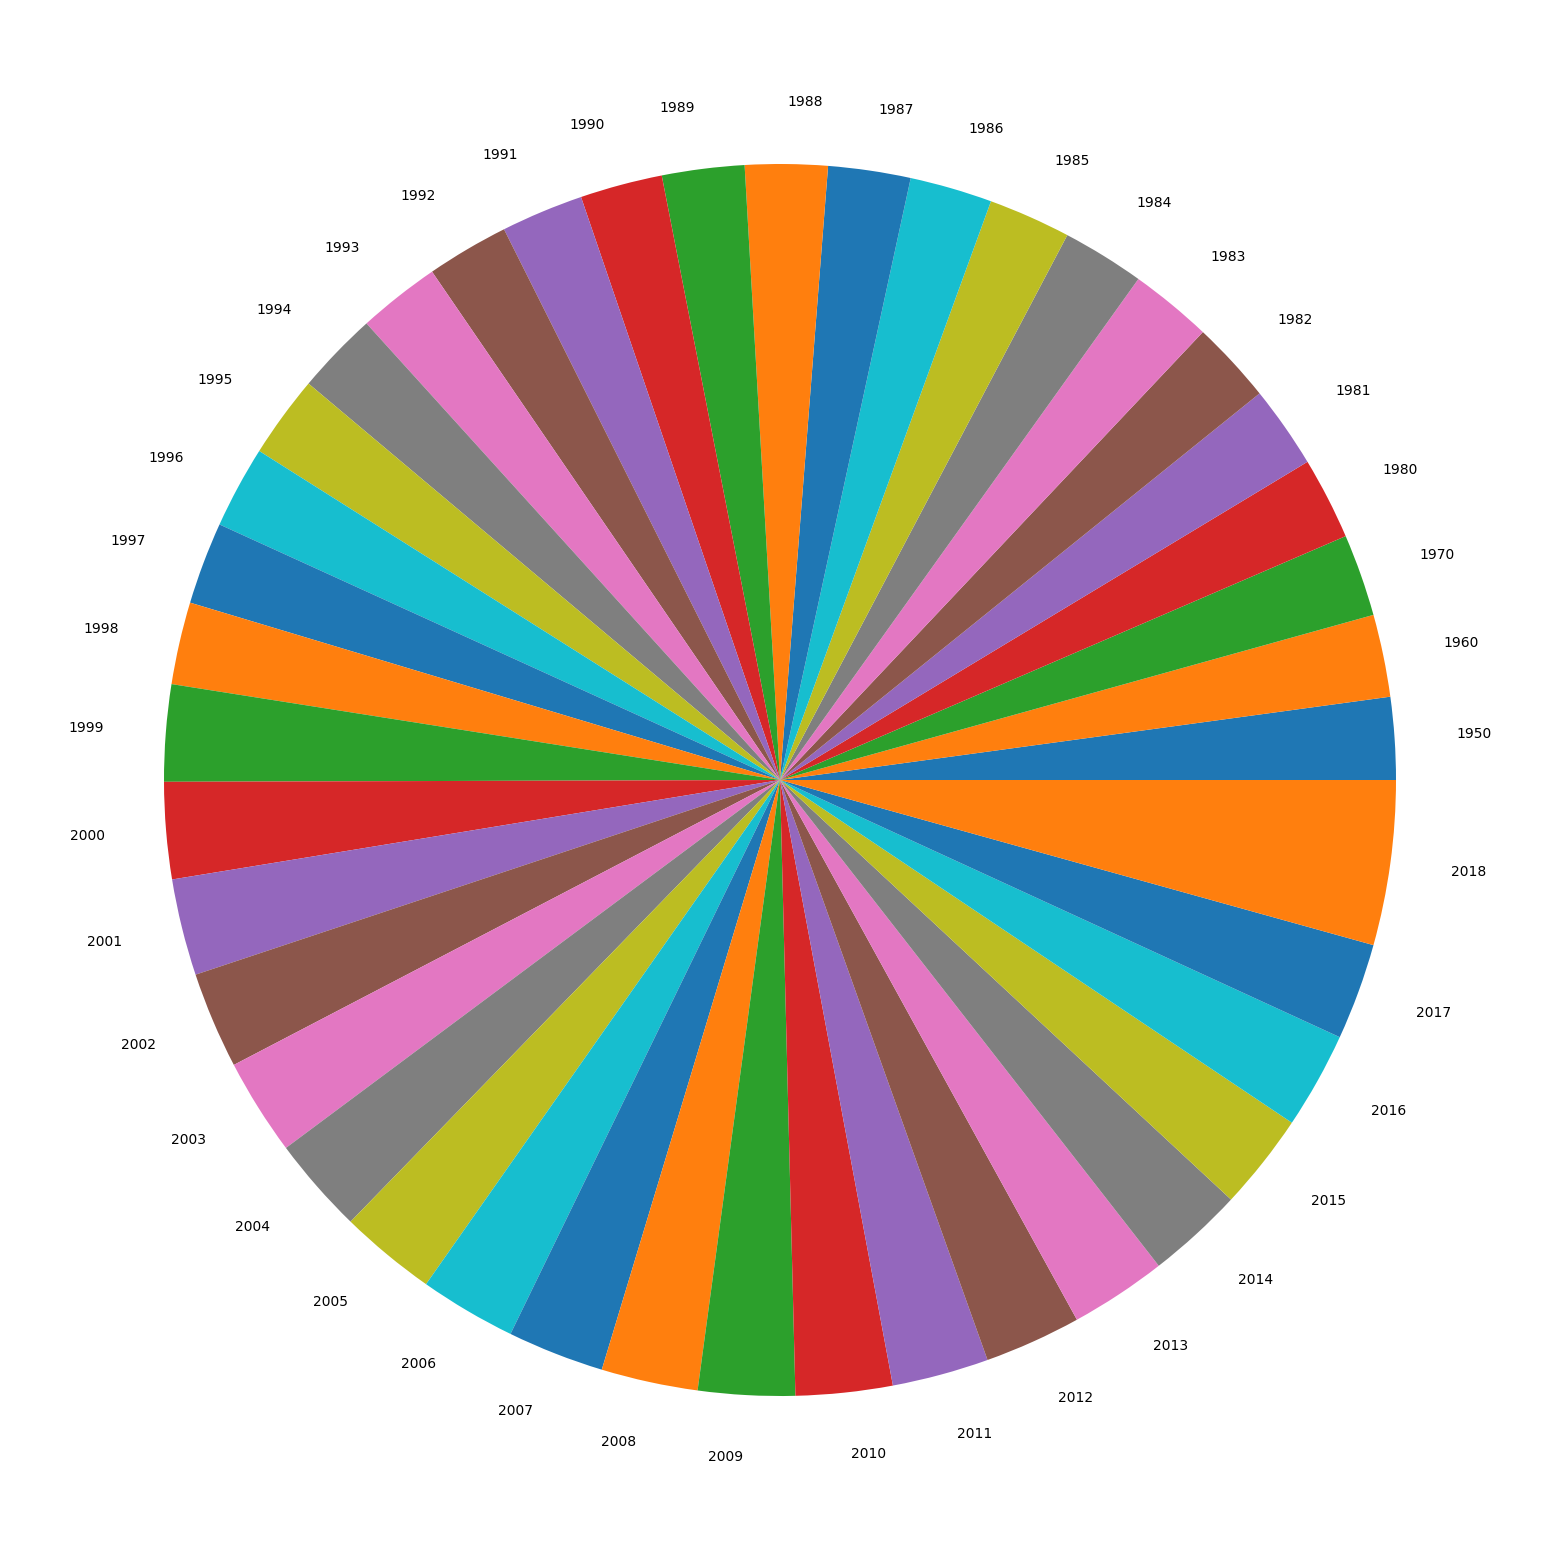

In [25]:
data.groupby('YEAR').size().plot(kind=('pie'),figsize=(20,20))

<Axes: >

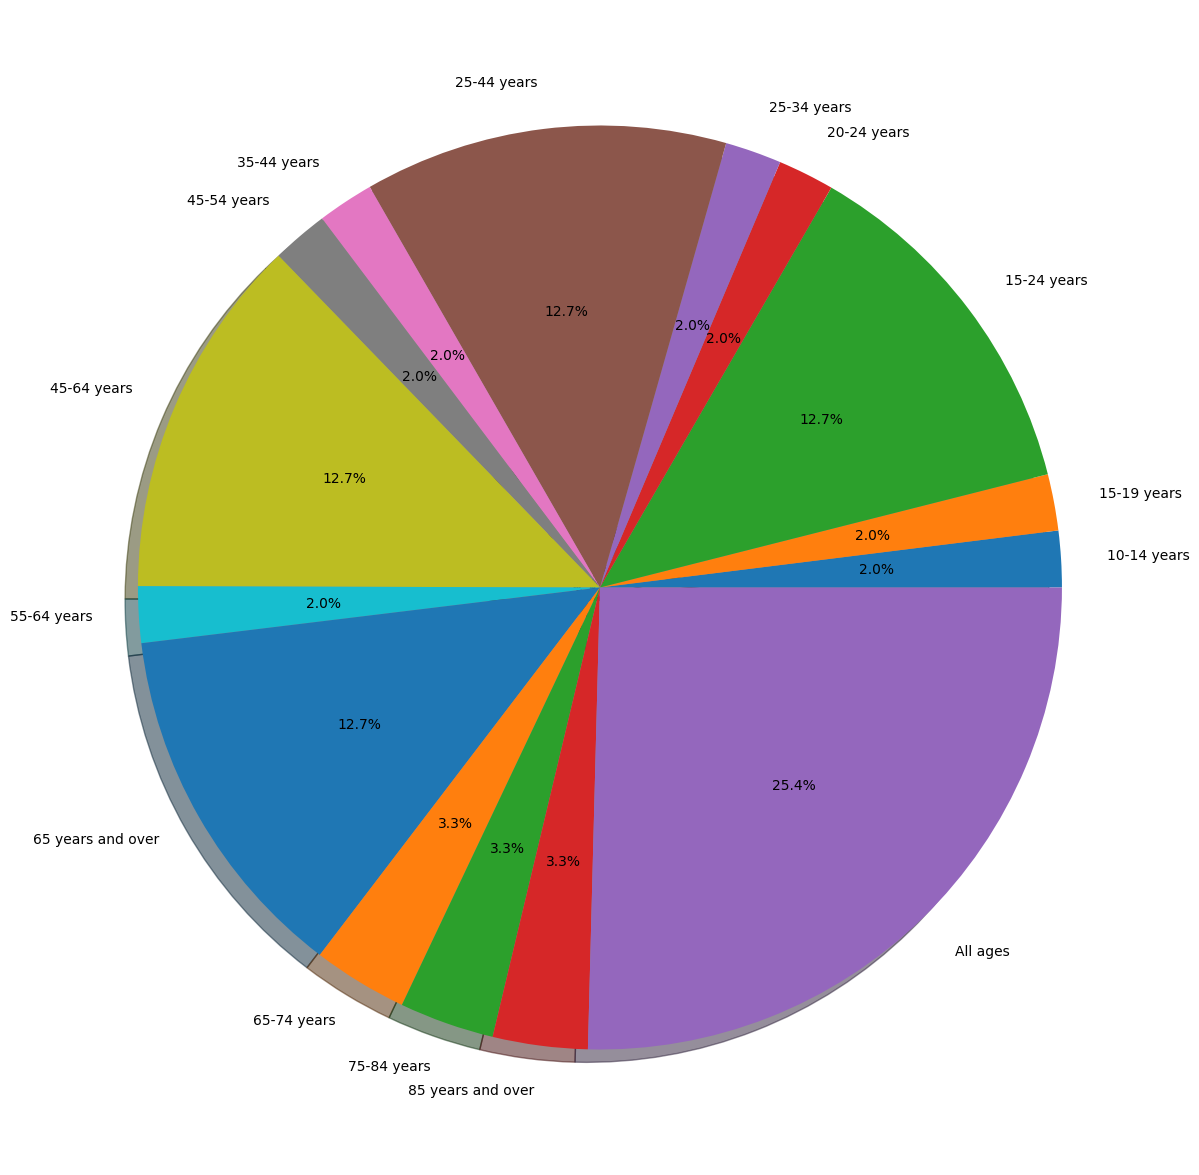

In [26]:
data.groupby('AGE').size().plot(kind='pie',figsize=(15,15), autopct='%1.1f%%',shadow=True)